In [1]:
%matplotlib widget

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

import sys
sys.path.append("../")
sys.path.append("../src/geotransformer/experiments/geotransformer.3dmatch.stage4.gse.k3.max.oacl.stage2.sinkhorn/")
from util.data import PairBreakingBadDataset

from multi_part_assembly.datasets.geometry_data import build_geometry_dataset, build_geometry_dataloader
from multi_part_assembly.datasets.geometry_data import GeometryPartDataset as BreakingBadDataset
import jhutil
import torch
from torch.utils.data import Dataset, DataLoader
import torch
from util.visualize import show_meshes
from util.visualize import show_point_clouds

## load config

In [3]:
from config import make_cfg

In [4]:
cfg = make_cfg()

In [5]:
cfg

{'seed': 7351,
 'working_dir': '/data/wlsgur4011/part_assembly/src/geotransformer/experiments/geotransformer.3dmatch.stage4.gse.k3.max.oacl.stage2.sinkhorn',
 'root_dir': '/data/wlsgur4011/part_assembly/src/geotransformer',
 'exp_name': 'geotransformer.3dmatch.stage4.gse.k3.max.oacl.stage2.sinkhorn',
 'output_dir': '/data/wlsgur4011/part_assembly/src/geotransformer/output/geotransformer.3dmatch.stage4.gse.k3.max.oacl.stage2.sinkhorn',
 'snapshot_dir': '/data/wlsgur4011/part_assembly/src/geotransformer/output/geotransformer.3dmatch.stage4.gse.k3.max.oacl.stage2.sinkhorn/snapshots',
 'log_dir': '/data/wlsgur4011/part_assembly/src/geotransformer/output/geotransformer.3dmatch.stage4.gse.k3.max.oacl.stage2.sinkhorn/logs',
 'event_dir': '/data/wlsgur4011/part_assembly/src/geotransformer/output/geotransformer.3dmatch.stage4.gse.k3.max.oacl.stage2.sinkhorn/events',
 'feature_dir': '/data/wlsgur4011/part_assembly/src/geotransformer/output/geotransformer.3dmatch.stage4.gse.k3.max.oacl.stage2.sin

## dataset

In [6]:
from dataset import test_dataset

In [10]:
dataset = test_dataset(cfg, "3DMatch")

In [11]:
data = dataset[0]
data

{'scene_name': '7-scenes-redkitchen',
 'ref_frame': 0,
 'src_frame': 1,
 'overlap': 0.7996478089653904,
 'ref_points': array([[ 0.04799998,  0.21599996,  0.8       ],
        [ 0.05400002,  0.21599996,  0.8       ],
        [ 0.07800007,  0.21599996,  0.8       ],
        ...,
        [-0.43799996, -1.3199999 ,  3.476     ],
        [-0.46799994, -1.308     ,  3.476     ],
        [-0.43799996, -1.326     ,  3.482     ]], dtype=float32),
 'src_points': array([[ 0.462     ,  0.27600002,  0.926     ],
        [ 0.48000002,  0.28200006,  0.926     ],
        [ 0.43799996,  0.26999998,  0.93200004],
        ...,
        [-0.11399996, -1.344     ,  3.284     ],
        [ 0.        , -1.332     ,  3.29      ],
        [-0.11399996, -1.3199999 ,  3.302     ]], dtype=float32),
 'ref_feats': array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], dtype=float32),
 'src_feats': array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.

In [12]:
def transform_point_cloud(transform_matrix, point_cloud):
    # Convert the point cloud to homogeneous coordinates
    num_points = point_cloud.shape[0]
    ones = torch.ones((num_points, 1), dtype=torch.float)
    point_cloud_h = torch.cat((point_cloud, ones), dim=1).t()

    # Perform the transformation
    transformed_point_cloud_h = torch.matmul(transform_matrix, point_cloud_h)

    # Convert back to 3D coordinates
    transformed_point_cloud = transformed_point_cloud_h[:3, :].t()

    return transformed_point_cloud


In [21]:
transform = torch.Tensor(data['transform'])
ref_points = torch.Tensor(data['ref_points'])
src_points = torch.Tensor(data['src_points'])

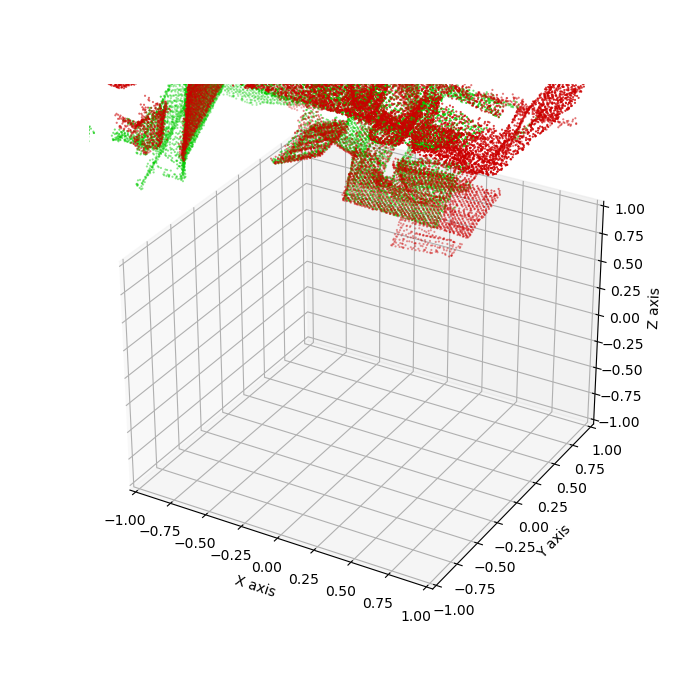

In [22]:


src_transformed = transform_point_cloud(transform, src_points)
show_point_clouds([src_transformed, ref_points, ], range=((-1, 1),(-1, 1),(-1, 1),))